In [49]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.

import streamlit as st
import os
import pathlib
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

## Gemini setup

In [11]:
os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

In [12]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [13]:
model = genai.GenerativeModel('gemini-pro')


## Test model

## Basic LLM Chain

In [48]:
# generate text
prompt = 'Who are you and what can you do?'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

I am a large language model, trained by Google.

* I am trained on a massive amount of text data, and I am able to understand and generate human language.
* I am able to perform many language-related tasks, such as:
    * Answering questions
    * Translating languages
    * Summarizing text
    * Generating text
    * Writing different kinds of creative content
    * Writing different kinds of code
    * Debugging code
    * Classifying text
    * Extracting information from text
* I am also able to perform some reasoning tasks, such as:
    * Making inferences
    * Solving problems
* I am still under development, but I am learning new things every day. I am excited to see what I will be able to do in the future.

I am also able to access and process information from the real world through integration with various APIs and services. This allows me to provide up-to-date and relevant information on a wide range of topics.

Here are some specific examples of things that I can do:

* **Answer your questions:** I can answer questions on a wide range of topics, including science, history, current events, and more.
* **Translate languages:** I can translate text between over 100 different languages.
* **Summarize text:** I can summarize long pieces of text into shorter, more concise summaries.
* **Generate text:** I can generate different kinds of text, such as stories, poems, and articles.
* **Write different kinds of creative content:** I can write different kinds of creative content, such as scripts, song lyrics, and marketing copy.
* **Write different kinds of code:** I can write different kinds of code, in a variety of programming languages.
* **Debug code:** I can help you debug code by identifying and fixing errors.
* **Classify text:** I can classify text into different categories, such as spam, ham, or news.
* **Extract information from text:** I can extract information from text, such as names, dates, and locations.
* **Make inferences:** I can make inferences based on the information that I have been trained on.
* **Solve problems:** I can solve problems by applying my knowledge and reasoning skills.

I am always learning new things, and I am excited to see what I will be able to do in the future.

## Google Gemini with langchain

In [53]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)


result = llm.invoke("What is a LLM?")

Markdown(result.content)

LLM stands for Large Language Model. It is a type of artificial intelligence (AI) that is trained on a massive amount of text data. This allows LLMs to understand and generate human language in a way that is both natural and informative.

LLMs are used in a variety of applications, including:

* **Natural language processing (NLP)**: LLMs can be used to perform a variety of NLP tasks, such as machine translation, text summarization, and sentiment analysis.
* **Question answering**: LLMs can be used to answer questions in a conversational way, making them useful for customer service and information retrieval applications.
* **Content generation**: LLMs can be used to generate text, such as news articles, blog posts, and marketing copy.
* **Code generation**: LLMs can be used to generate code in a variety of programming languages.

LLMs are still under development, but they have the potential to revolutionize the way we interact with computers. They can help us to communicate more effectively, access information more easily, and create new and innovative products and services.

Here are some examples of LLMs:

* **Google's BERT (Bidirectional Encoder Representations from Transformers)**: BERT is a pre-trained language model that was released in 2018. It has been used to achieve state-of-the-art results on a variety of NLP tasks.
* **OpenAI's GPT-3 (Generative Pre-trained Transformer 3)**: GPT-3 is a pre-trained language model that was released in 2020. It is the largest and most powerful language model ever created. GPT-3 has been used to generate text, code, and music.
* **Microsoft's Turing-NLG (Natural Language Generation)**: Turing-NLG is a pre-trained language model that was released in 2021. It is designed to generate natural and informative text. Turing-NLG has been used to generate news articles, product descriptions, and marketing copy.

LLMs are a rapidly developing field of AI. As LLMs continue to improve, we can expect to see them used in even more applications in the future.

## Basic multi-chain

In [57]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [65]:
prompt = ChatPromptTemplate.from_template(
    "tell me a joke about {topic}"
)

output_parser = StrOutputParser()

In [66]:
chain = prompt | model | output_parser

In [67]:
chain.invoke({"topic": "sleeping"})

'Why did the man put his bed in the corner of the room?\n\nSo he could wake up in the morning and say, "I woke up in the corner!"'

## Use LangChain to Access Gemini Pro Model

In [50]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)


result = llm.invoke("What is a LLM?")

Markdown(result.content)

A LLM (Large Language Model) is a type of deep learning model that has been trained on a massive amount of text data. LLMs are able to perform a wide range of natural language processing tasks, such as text generation, translation, summarization, and question answering.

LLMs work by learning the statistical relationships between words and phrases in a language. This allows them to generate text that is both coherent and grammatically correct. LLMs can also be used to translate text from one language to another, or to summarize a long piece of text into a shorter, more concise version.

Some of the most well-known LLMs include:

* **GPT-3:** Developed by Google, GPT-3 is one of the largest and most powerful LLMs available. It has been trained on over 45 terabytes of text data, and it is able to perform a wide range of natural language processing tasks.
* **BERT:** Developed by Google, BERT is a LLM that is specifically designed for understanding the meaning of words and phrases in context. It has been trained on a large corpus of English text, and it is able to perform a variety of natural language processing tasks, such as text classification, question answering, and named entity recognition.
* **XLNet:** Developed by Google, XLNet is a LLM that is designed to overcome some of the limitations of previous LLMs. It has been trained on a large corpus of English text, and it is able to perform a variety of natural language processing tasks, such as text classification, question answering, and text generation.

LLMs are still under development, but they have the potential to revolutionize the way we interact with computers. They could be used to create new and innovative applications, such as chatbots, personal assistants, and language translation tools.

## Using langchain to access Gemini Pro Vision Model

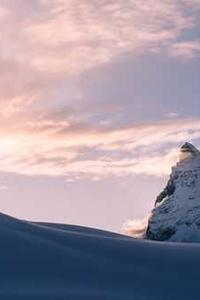

In [70]:
import requests
import io
from PIL import Image

def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://picsum.photos/seed/picsum/200/300")

In [73]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"What's in this image"
        },
        {
            "type":"image_url",
            "image_url": "https://picsum.photos/seed/picsum/200/300"
        }
    ]
)

## Chat with document

In [75]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

In [117]:
loader = PyPDFDirectoryLoader("pdfs")
data = loader.load_and_split()

In [118]:
print(data)

[Document(page_content='©Manning Publications Co.  To comment go to  liveBook \nMEAP Edition \nManning Early Access Program \nPySpark in Action \nPython data analysis at scale \nVersion 6 \nCopyright 2020 Manning Publications \nFor more information on this and other Manning titles go to \nmanning.com', metadata={'source': 'pdfs\\Jonathan Rioux - Data Analysis with Python and PySpark-Manning (2022).pdf', 'page': 1}), Document(page_content='©Manning Publications Co.  To comment go to  liveBook welcome  \nThank you for purchasing the MEAP for PySpark in Action: Python data analysis at scale.  \nIt is a lot of fun (and work!) and I hope you’ll enjoy reading it as much as I am enjoying \nwriting the book. \nMy journey with PySpark is pretty typical: the company I used to work for migrated their \ndata infrastructure to a data lake and realized along the way that their usual warehouse-type \njobs didn’t work so well anymore. I spent most of my first months there figuring out how to \nmake Py

In [122]:
print(data[1].page_content)

©Manning Publications Co.  To comment go to  liveBook welcome  
Thank you for purchasing the MEAP for PySpark in Action: Python data analysis at scale.  
It is a lot of fun (and work!) and I hope you’ll enjoy reading it as much as I am enjoying 
writing the book. 
My journey with PySpark is pretty typical: the company I used to work for migrated their 
data infrastructure to a data lake and realized along the way that their usual warehouse-type 
jobs didn’t work so well anymore. I spent most of my first months there figuring out how to 
make PySpark work for my colleagues and myself, starting from zero. This book is very 
influenced by the questions I got from my colleagues and students (and sometimes myself). 
I’ve found that combining practical experience through real examples with a little bit of 
theory brings not only proficiency in using PySpark, but also how to build better data 
programs. This book walks the line between the two by explaining important theoretical 
concepts wit

In [123]:
context = "\n".join(str(p.page_content) for p in data)
print("The total number of words in the context:", len(context))


The total number of words in the context: 451293


## Split the Extracted Data into Text Chunks

* Chunk Size (e.g., 10000 letters): The maximum length of each small piece you cut from the string.

* Chunk Overlap (e.g., 200 letters): Some of the letters at the end of one piece are also at the beginning of the next piece.

In [124]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=200)
context = "\n\n".join(str(p.page_content) for p in data)

In [125]:
texts = text_splitter.split_text(context)

In [126]:
print(len(texts))

50


In [127]:
texts[0]

'©Manning Publications Co.  To comment go to  liveBook \nMEAP Edition \nManning Early Access Program \nPySpark in Action \nPython data analysis at scale \nVersion 6 \nCopyright 2020 Manning Publications \nFor more information on this and other Manning titles go to \nmanning.com\n\n©Manning Publications Co.  To comment go to  liveBook welcome  \nThank you for purchasing the MEAP for PySpark in Action: Python data analysis at scale.  \nIt is a lot of fun (and work!) and I hope you’ll enjoy reading it as much as I am enjoying \nwriting the book. \nMy journey with PySpark is pretty typical: the company I used to work for migrated their \ndata infrastructure to a data lake and realized along the way that their usual warehouse-type \njobs didn’t work so well anymore. I spent most of my first months there figuring out how to \nmake PySpark work for my colleagues and myself, starting from zero. This book is very \ninfluenced by the questions I got from my colleagues and students (and sometimes

## Download google embeddings model

In [128]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
     

In [129]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")


## Create embeddings for each of the text chunks and save them into a vector store (chromadb)

In [130]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()


In [131]:
prompt_template = """
  Answer the question as detailed as possible from the provided context, make sure to provide all the details, if the answer is not in
  provided context just say, "answer is not available in the context", don't provide the wrong answer\n\n
  Context:\n {context}?\n
  Question: \n{question}\n

  Answer:
"""

prompt = PromptTemplate(template = prompt_template, input_variables = ["context", "question"])

In [132]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)


* The stuff documents chain (“stuff” as in “to stuff” or “to fill”) is the most straightforward of the document chains. It takes a list of documents, inserts them all into a prompt and passes    that prompt to an LLM.

* This chain is well-suited for applications where documents are small and only a few are passed in for most calls.


In [133]:
chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

In [140]:
question = "What is his education background"
docs = vector_index.get_relevant_documents(question)
response = chain(
    {"input_documents":docs, "question": question}
    , return_only_outputs=True)

In [139]:
response

{'output_text': 'Master of Engineering in Chemical Engineering with Oil and Gas (MEng) from Heriot-Watt University, Putrajaya, Malaysia'}